In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [2]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [3]:
#Checking matter power spectrum 
twin_settings = {'output':'mPk',
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09 ,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   'r_all_twin':0.2,
                   'Delta_N_twin':0.3,
                   'ratio_vev_twin':3,
                   'gauge':'newtonian'}  

M_twin = Class()
M_twin.set(twin_settings)
M_twin.compute()

twin_settings = {'output':'mPk',
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09 ,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   'r_all_twin':0.1,
                   'Delta_N_twin':0.3,
                   'ratio_vev_twin':3,
                   'gauge':'newtonian'}  

M_twin1 = Class()
M_twin1.set(twin_settings)
M_twin1.compute()

LambdaCDM_DeltaNeff_settings = {'output':'mPk',
                                   'h':0.67810,
                                   'omega_b':0.02238280,
                                   'omega_cdm':0.1201075,
                                   'A_s':2.100549e-09 ,
                                   'n_s':0.9660499,
                                   'tau_reio':0.05430842,
                                   'N_ur':3.046 + 0.3,
                                   'r_all_twin':0,
                                    'Delta_N_twin':0.3,
                                   'ratio_vev_twin':1,
                                   'gauge':'newtonian'} 


M = Class()
M.set(LambdaCDM_DeltaNeff_settings)
M.compute()

Text(0.5,1,'MTH/(LCDM+dN) mPk, deltaN=0.3,v/v=3')

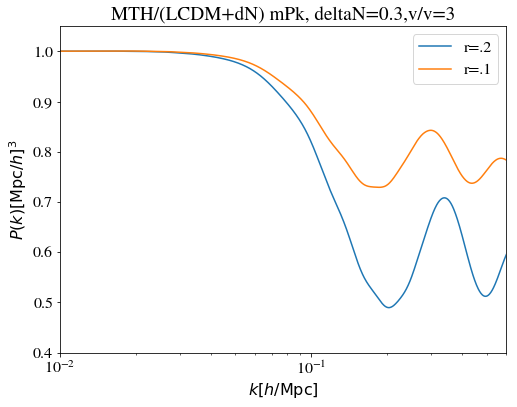

In [4]:

kk = np.logspace (-2,np.log10(0.6),1000)
Pk = []
Pk_twin = []
Pk_twin1 = []
for k in kk :
    Pk.append (M.pk (k ,0.) ) 
    Pk_twin.append (M_twin.pk (k ,0.) )
    Pk_twin1.append (M_twin1.pk (k ,0.) )

plt.figure (2)
plt.xscale ('log'); plt.xlim (kk[0],kk[ -1]); plt.ylim(0.4,1.05);
plt.xlabel (r'$k [h/\mathrm { Mpc }]$')
plt.ylabel (r'$P(k) [\mathrm {Mpc }/h ]^3 $')
#plt.plot (kk ,Pk ,'b-')
#plt.plot (kk ,Pk_twin ,'r-')
plt.plot(kk,np.array(Pk_twin)/np.array(Pk),label='r=.2')
plt.plot(kk,np.array(Pk_twin1)/np.array(Pk),label='r=.1')
plt.legend()
plt.title('MTH/(LCDM+dN) mPk, deltaN=0.3,v/v=3')

In [5]:
common_settings = {'output' : 'tCl',
                   # LambdaCDM parameters
                   'h':0.6781,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   'thermodynamics_verbose':1,
                   #MTH parameters
                   'r_all_twin':0.1,
                   'Delta_N_twin':0.3,
                   'ratio_vev_twin':8,
                  # 'YHE_twin':'BBN'
                   }  
##############
#    
# call CLASS
#
###############
M = Class()
M.set(common_settings)
M.compute()
derived = M.get_current_derived_parameters(['tau_rec','conformal_age'])
thermo = M.get_thermodynamics()

#Checking recombination, visibility function 
common_settings = {'output' : 'tCl',
                   # LambdaCDM parameters
                   'h':0.6781,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   'thermodynamics_verbose':1,
                   #MTH parameters
                   'r_all_twin':0.1,
                   'Delta_N_twin':0.1,
                   'ratio_vev_twin':3,
                  # 'YHE_twin':'BBN'
                   }  
##############
#    
# call CLASS
#
###############
M1 = Class()
M1.set(common_settings)
M1.compute()
derived1 = M1.get_current_derived_parameters(['tau_rec','conformal_age'])
thermo1 = M1.get_thermodynamics()

Text(0.5,1,'visibility function g')

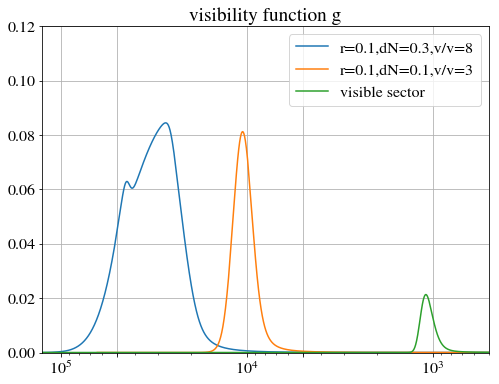

In [6]:
plt.semilogx(thermo['z'],thermo['g_twin'],label='r=0.1,dN=0.3,v/v=8')
plt.semilogx(thermo1['z'],thermo1['g_twin'],label='r=0.1,dN=0.1,v/v=3')

plt.semilogx(thermo['z'],thermo['g [Mpc^-1]'],label='visible sector')
plt.gca().set_xticks(ticks=[10**5,5*10**4,10**4,5*10**3,10**3])
plt.grid()

plt.xlim(5*10**2,10**5.1)
plt.ylim(0,0.12)
plt.gca().invert_xaxis()
plt.legend()
plt.title('visibility function g')